# Final Assignment - Statistics for Data Science with Python 

__Project Scenario:__ You are a Data Scientist with a housing agency in Boston MA, you have been given access to a previous dataset on housing prices derived from the U.S. Census Service to present insights to higher management. Based on your experience in Statistics, what information can you provide them to help with making an informed decision? Upper management will like to get some insight into the following.

- Is there a significant difference in the median value of houses bounded by the Charles river or not?

- Is there a difference in median values of houses of each proportion of owner-occupied units built before 1940?

- Can we conclude that there is no relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town?

- What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner-occupied homes?

## Importing Libraries

In [1]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

## Importing DataSet 

In [44]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
df = pd.read_csv(boston_url)

In [5]:
df

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


##  Analyzing the data

In [6]:
df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.5 KB


***

## Descriptive Statistics

### Question 1 - For the "Median value of owner-occupied homes" provide a boxplot

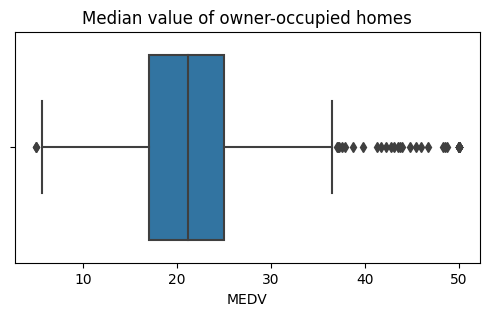

In [8]:
plt.figure(figsize=(6,3))
sns.boxplot(x = "MEDV", data=df)
plt.title("Median value of owner-occupied homes")
plt.show()

### Question 2 - Provide a histogram for the Charles river variable

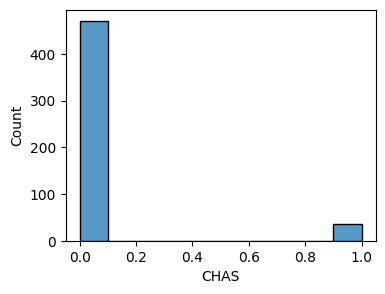

In [9]:
plt.figure(figsize=(4,3))
sns.histplot(df.CHAS)
plt.show()

### Question 3 - Provide a boxplot for the MEDV variable vs three AGE variable. 

In [10]:
# Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older

df.loc[df["AGE"]<=35, "age_group"] = "35 and younger"
df.loc[(df["AGE"]>35) & (df["AGE"]<70), "age_group"] = "between 35 and 70"
df.loc[df["AGE"]>=75, "age_group"] = "70 and older"

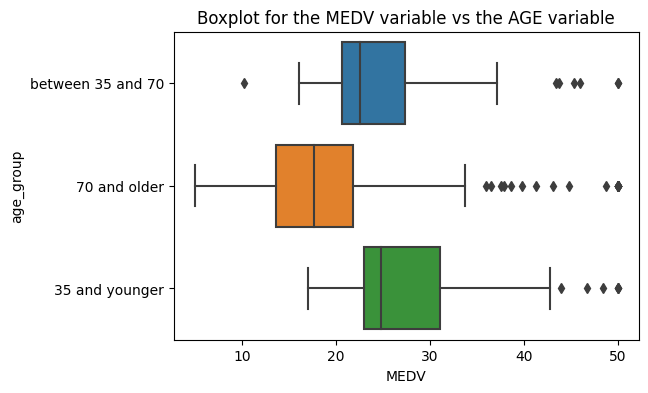

In [11]:
# plotting

plt.figure(figsize=(6,4))
sns.boxplot(x=df.MEDV, y=df.age_group)
plt.title("Boxplot for the MEDV variable vs the AGE variable")
plt.show()

In [12]:
# Post addition of age_group column
df.age_group.value_counts()

age_group
70 and older         263
between 35 and 70    128
35 and younger        91
Name: count, dtype: int64

### Question 4 - Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

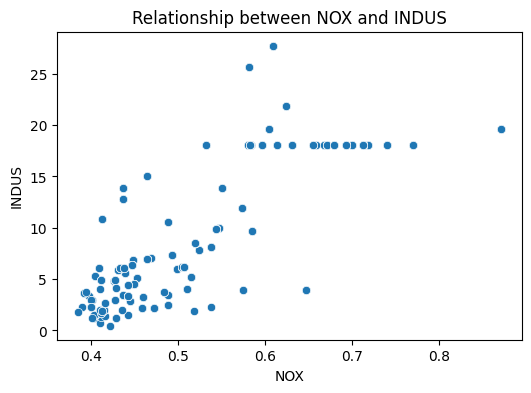

In [13]:
plt.figure(figsize=(6,4))
sns.scatterplot(x=df.NOX, y=df.INDUS)
plt.title("Relationship between NOX and INDUS")
plt.show()

### Question 5: Create a histogram for the pupil to teacher ratio variable

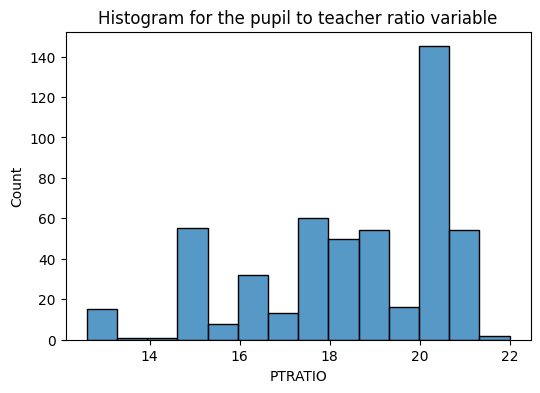

In [14]:
plt.figure(figsize=(6,4))
sns.histplot(data=df.PTRATIO)
plt.title("Histogram for the pupil to teacher ratio variable")
plt.show()

***

# Use the appropriate tests to answer the questions provided. For each of the following questions;

1. Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

2. Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

3. Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

4. What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)


Be sure to:

- State your hypothesis.
- Use α = 0.05
- Perform the test Statistics.
- State the conclusion from the test.

In [15]:
# Defining alpha
a = 0.05

### 1. Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

- __Null Hypothesis__ -> There's no significant difference in median value between houses bounded and not bounded by the Charles River

- __Alternative Hypothesis__ -> There's a significant difference in median value between houses bounded and not bounded by the Charles River

In [16]:
df["CHAS"].value_counts()

CHAS
0.0    471
1.0     35
Name: count, dtype: int64

In [17]:
not_bounded = (df[df["CHAS"]==0])["MEDV"]
bounded = (df[df["CHAS"]==1])["MEDV"]

In [27]:
results = scipy.stats.ttest_ind(bounded, not_bounded)

print(f"P-value={results[1]}, T-statistic={results[0]}")

P-value=7.390623170519905e-05, T-statistic=3.996437466090509


__CONCLUSION:__ Since the p-value is less than alpha value 0.05, we reject the null hypothesis as there is enough proof that there is a statistical difference in in median value of houses bounded by the Charles river

### 2. Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

- __Null Hypothesis__ -> µ1=µ2=µ3 (the three population means of the 3 categories of age groups are equal)
- __Alternative Hypothesis__ -> At least one of the means differ


In [19]:
df

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,age_group
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,between 35 and 70
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,70 and older
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,between 35 and 70
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,between 35 and 70
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,between 35 and 70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4,between 35 and 70
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6,70 and older
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9,70 and older
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0,70 and older


In [29]:
g1 = df[df["age_group"] == '35 and younger']["MEDV"]
g2 = df[df["age_group"] == 'between 35 and 70']["MEDV"]
g3 = df[df["age_group"] == '70 and older']["MEDV"]

f_stats,p_value = scipy.stats.f_oneway(g1, g2, g3, axis=0)
print(f"F-Statistic={f_stats}, P-value={p_value}")

F-Statistic=39.48680546865226, P-value=1.3377777392035556e-16


__CONCLUSION:__ Since the p-value is less than alpha value 0.05, we reject the null hypothesis as there is enough proof that there is a statistical difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE).

### 3. Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)
- __Null Hypothesis:__ Nitric Oxide concentration is not correlated with the proportion of non-retail business acres per town

- __Alternative Hypothesis:__ Nitric Oxide concentration is correlated with the proportion of non-retail business acres per town

In [34]:
results = scipy.stats.pearsonr(df["NOX"], df["INDUS"])
print(f"P-value={results[1]} Statistic={results[0]}")

P-value=7.91336106123623e-98 Statistic=0.7636514469209157


__CONCLUSION:__ Since the p-value is less than 0.05, we reject the Null hypothesis and conclude that there exists a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.

### 4. What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

Regression Model : 
    y = B0 + B1*x1 + e

- __Null Hypothesis:__ There is no impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes ie. B1 = 0

- __Alternative Hypothesis:__ There is an impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes ie. B1 not equal to 0

In [41]:
y = df["DIS"] # input variable
X = df["MEDV"] # target variable
X = sm.add_constant(X)
model = sm.OLS(y,X).fit()
prediction = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    DIS   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Thu, 08 Jun 2023   Prob (F-statistic):           1.21e-08
Time:                        11:47:37   Log-Likelihood:                -1078.0
No. Observations:                 506   AIC:                             2160.
Df Residuals:                     504   BIC:                             2168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5057      0.240     10.428      0.000       2.034       2.978
MEDV           0.0572      0.010      5.795      0.000       0.038       0.077
==============================================================================
Omnibus:                       70.837   Durbin-Watson:                   0.138
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               98.167
Skew:                           1.000   Prob(JB):                     4.82e-22
Kurtosis:                       3.809   Cond. No.                         64.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

__CONCLUSION:__ The p-value is less than the alpha (a) level = 0.05, so we reject the null hypothesis as there is evidence that there is impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes.

***
***